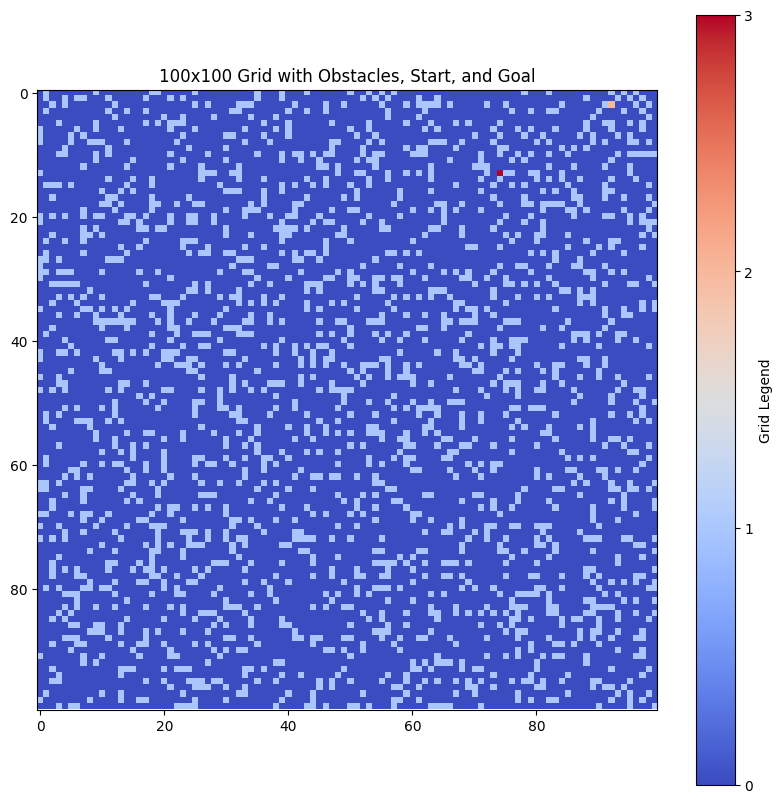

((2, 92), (13, 74))

In [1]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 100
grid = np.zeros((grid_size, grid_size), dtype=int)

obstacle_density = 0.2
num_obstacles = int(obstacle_density * grid_size**2)

obstacle_indices = np.random.choice(grid_size**2, num_obstacles, replace=False)
for idx in obstacle_indices:
    row, col = divmod(idx, grid_size)
    grid[row, col] = 1

start, goal = None, None
while not start or grid[start] == 1:
    start = (np.random.randint(0, grid_size), np.random.randint(0, grid_size))
while not goal or grid[goal] == 1 or goal == start:
    goal = (np.random.randint(0, grid_size), np.random.randint(0, grid_size))

grid[start] = 2
grid[goal] = 3

plt.figure(figsize=(10, 10))
plt.imshow(grid, cmap="coolwarm", origin="upper")
plt.title("100x100 Grid with Obstacles, Start, and Goal")
plt.colorbar(ticks=[0, 1, 2, 3], label="Grid Legend")
plt.show()

start, goal

In [2]:
actions = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1)
}

def is_valid_state(state):
    x, y = state
    return 0 <= x < grid_size and 0 <= y < grid_size and grid[x, y] != 1

def get_next_state(state, action):
    delta_x, delta_y = actions[action]
    next_state = (state[0] + delta_x, state[1] + delta_y)
    return next_state if is_valid_state(next_state) else state

def get_reward(state):
    if state == goal:
        return 10 
    elif grid[state] == 1:
        return -5 
    else:
        return -1  


current_state = start
sample_transitions = {action: get_next_state(current_state, action) for action in actions}
sample_rewards = {action: get_reward(sample_transitions[action]) for action in actions}

current_state, sample_transitions, sample_rewards

((2, 92),
 {'up': (1, 92), 'down': (3, 92), 'left': (2, 92), 'right': (2, 93)},
 {'up': -1, 'down': -1, 'left': -1, 'right': -1})

In [3]:
policy = {state: np.random.choice(list(actions.keys())) for state in np.ndindex(grid.shape) if grid[state] != 1}
value_function = {state: 0 for state in np.ndindex(grid.shape)}


gamma = 0.9  
theta = 1e-4  

def policy_evaluation(policy, value_function):
    while True:
        delta = 0
        for state in value_function:
            if grid[state] == 1 or state == goal:
                continue
            action = policy[state]
            next_state = get_next_state(state, action)
            reward = get_reward(next_state)
            new_value = reward + gamma * value_function[next_state]
            delta = max(delta, abs(value_function[state] - new_value))
            value_function[state] = new_value
        if delta < theta:
            break

def policy_improvement(policy, value_function):
    policy_stable = True
    for state in policy:
        if grid[state] == 1 or state == goal:
            continue
        action_returns = {}
        for action in actions:
            next_state = get_next_state(state, action)
            action_returns[action] = get_reward(next_state) + gamma * value_function[next_state]
        best_action = max(action_returns, key=action_returns.get)
        if policy[state] != best_action:
            policy_stable = False
            policy[state] = best_action
    return policy_stable


while True:
    policy_evaluation(policy, value_function)
    if policy_improvement(policy, value_function):
        break


policy, value_function

({(0, 0): 'down',
  (0, 2): 'right',
  (0, 3): 'right',
  (0, 4): 'right',
  (0, 5): 'right',
  (0, 6): 'right',
  (0, 7): 'right',
  (0, 8): 'down',
  (0, 10): 'right',
  (0, 11): 'right',
  (0, 12): 'down',
  (0, 13): 'down',
  (0, 14): 'down',
  (0, 15): 'down',
  (0, 16): 'down',
  (0, 17): 'left',
  (0, 20): 'down',
  (0, 21): 'right',
  (0, 22): 'down',
  (0, 23): 'right',
  (0, 24): 'down',
  (0, 26): 'down',
  (0, 27): 'down',
  (0, 28): 'down',
  (0, 29): 'down',
  (0, 30): 'down',
  (0, 31): 'down',
  (0, 32): 'down',
  (0, 33): 'down',
  (0, 34): 'down',
  (0, 36): 'down',
  (0, 37): 'down',
  (0, 38): 'down',
  (0, 40): 'down',
  (0, 41): 'down',
  (0, 42): 'down',
  (0, 44): 'down',
  (0, 45): 'down',
  (0, 46): 'down',
  (0, 47): 'down',
  (0, 48): 'down',
  (0, 49): 'down',
  (0, 51): 'down',
  (0, 52): 'left',
  (0, 54): 'up',
  (0, 56): 'up',
  (0, 58): 'down',
  (0, 59): 'down',
  (0, 60): 'down',
  (0, 61): 'right',
  (0, 62): 'right',
  (0, 63): 'right',
  (0, 64): 

In [4]:
q_table = {state: {action: 0 for action in actions} for state in np.ndindex(grid.shape) if grid[state] != 1}
alpha = 0.1  
gamma = 0.9  
epsilon = 0.2  
num_episodes = 5000

for episode in range(num_episodes):
    state = start
    while state != goal:
        if np.random.rand() < epsilon:
            action = np.random.choice(list(actions.keys()))  
        else:
            action = max(q_table[state], key=q_table[state].get)  

        next_state = get_next_state(state, action)
        reward = get_reward(next_state)

        
        best_next_action = max(q_table[next_state], key=q_table[next_state].get) if next_state in q_table else action
        q_table[state][action] = q_table[state][action] + alpha * (reward + gamma * q_table[next_state][best_next_action] - q_table[state][action])

        
        state = next_state


rl_policy = {state: max(q_table[state], key=q_table[state].get) for state in q_table}


rl_policy

{(0, 0): 'left',
 (0, 2): 'up',
 (0, 3): 'down',
 (0, 4): 'up',
 (0, 5): 'up',
 (0, 6): 'down',
 (0, 7): 'up',
 (0, 8): 'down',
 (0, 10): 'up',
 (0, 11): 'up',
 (0, 12): 'right',
 (0, 13): 'up',
 (0, 14): 'up',
 (0, 15): 'right',
 (0, 16): 'right',
 (0, 17): 'down',
 (0, 20): 'up',
 (0, 21): 'down',
 (0, 22): 'left',
 (0, 23): 'right',
 (0, 24): 'up',
 (0, 26): 'down',
 (0, 27): 'left',
 (0, 28): 'left',
 (0, 29): 'up',
 (0, 30): 'up',
 (0, 31): 'right',
 (0, 32): 'right',
 (0, 33): 'right',
 (0, 34): 'up',
 (0, 36): 'left',
 (0, 37): 'up',
 (0, 38): 'up',
 (0, 40): 'up',
 (0, 41): 'up',
 (0, 42): 'right',
 (0, 44): 'down',
 (0, 45): 'left',
 (0, 46): 'left',
 (0, 47): 'up',
 (0, 48): 'up',
 (0, 49): 'left',
 (0, 51): 'right',
 (0, 52): 'up',
 (0, 54): 'up',
 (0, 56): 'up',
 (0, 58): 'up',
 (0, 59): 'left',
 (0, 60): 'left',
 (0, 61): 'up',
 (0, 62): 'up',
 (0, 63): 'up',
 (0, 64): 'up',
 (0, 65): 'up',
 (0, 66): 'up',
 (0, 67): 'right',
 (0, 68): 'up',
 (0, 69): 'up',
 (0, 70): 'down'

In [5]:
def simulate_policy(policy, start, goal):
    state = start
    steps = 0
    total_reward = 0
    while state != goal and steps < 10000:
        action = policy[state]
        next_state = get_next_state(state, action)
        reward = get_reward(next_state)
        total_reward += reward
        state = next_state
        steps += 1
    return steps, total_reward


num_trials = 100
dp_results = [simulate_policy(policy, start, goal) for _ in range(num_trials)]
rl_results = [simulate_policy(rl_policy, start, goal) for _ in range(num_trials)]


avg_dp_steps = sum(result[0] for result in dp_results) / num_trials
avg_dp_reward = sum(result[1] for result in dp_results) / num_trials
avg_rl_steps = sum(result[0] for result in rl_results) / num_trials
avg_rl_reward = sum(result[1] for result in rl_results) / num_trials

{
    "DP Method": {"Average Steps": avg_dp_steps, "Average Reward": avg_dp_reward},
    "RL Method": {"Average Steps": avg_rl_steps, "Average Reward": avg_rl_reward}
}


{'DP Method': {'Average Steps': 29.0, 'Average Reward': -18.0},
 'RL Method': {'Average Steps': 29.0, 'Average Reward': -18.0}}